In [1]:
import json
import requests
import random as random
from pprint import pprint
from config import fapi_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Marijuana Legalization's Effect on Public Safety

Colorado's arrest rates have not deviated from national arrest rate trends, nor have they deviated from states with similar population makeups. 

Violent crime has risen slightly since the legalization of recreational marijuana, but its peak has not surpassed that of pre-legalization arrest rates. Petty crime arrests have been plummeting since 2012, but they've continued trending down at a similar rate prior to legalization. Drug related arrests plummeted immediately after legalization, but followed national drug related arrest trends immediately following 2013. It is important to note that drug related arrests plummeted because of a drop in drug possession arrests. Arrests related to drug sales remained consistent with pre-2012 levels.

By using arrest data, we can see that Colorado's arrest rate for violent, drug related, and petty crimes are unexceptional when compared to the rest of the country and states with similar population makeups. Legalization of marijuna did not appear to significantly change the amount of arrests made in Colorado, one way or the other.

In [22]:
#Breaking data into subsets
co_violent = pd.read_csv('co_violent_crime.csv')
co_drug_subtotals = pd.read_csv('co_drug_sub.csv')
co_petty = pd.read_csv('co_petty.csv')
mn_violent = pd.read_csv('mn_violent_crime.csv')
mn_drug_subtotals = pd.read_csv('mn_drug_sub.csv')
mn_petty = pd.read_csv('mn_petty.csv')
or_violent = pd.read_csv('or_violent_crime.csv')
or_drug_subtotals = pd.read_csv('or_drug_sub.csv')
or_petty = pd.read_csv('or_petty.csv')
nat_violent = pd.read_csv('nat_violent_crime.csv')
nat_drug_subtotals = pd.read_csv('nat_drug_sub.csv')
nat_petty = pd.read_csv('nat_petty.csv')
co_violent

,Unnamed: 0,data_year,murder,rape,aggravated_assault,robbery,manslaughter,total_arrests,population,arrest_rate
0,0,2006,112,489,5471,1062,5,7139,4720423,151.236446
1,1,2007,113,452,4985,879,9,6438,4803868,134.017005
2,2,2008,166,498,5407,954,5,7030,4889730,143.770719
3,3,2009,167,466,5542,1129,9,7313,4972195,147.077900
4,4,2010,131,493,5413,952,9,6998,5047349,138.647040
5,5,2011,124,432,4639,975,5,6175,5121108,120.579375
6,6,2012,117,351,4214,897,4,5583,5192647,107.517418
7,7,2013,116,431,4202,1007,5,5761,5269035,109.336909
8,8,2014,130,463,4413,931,8,5945,5350101,111.119398
9,9,2015,106,475,4797,1007,3,6388,5450623,117.197612


# CO Violent Crime Graph

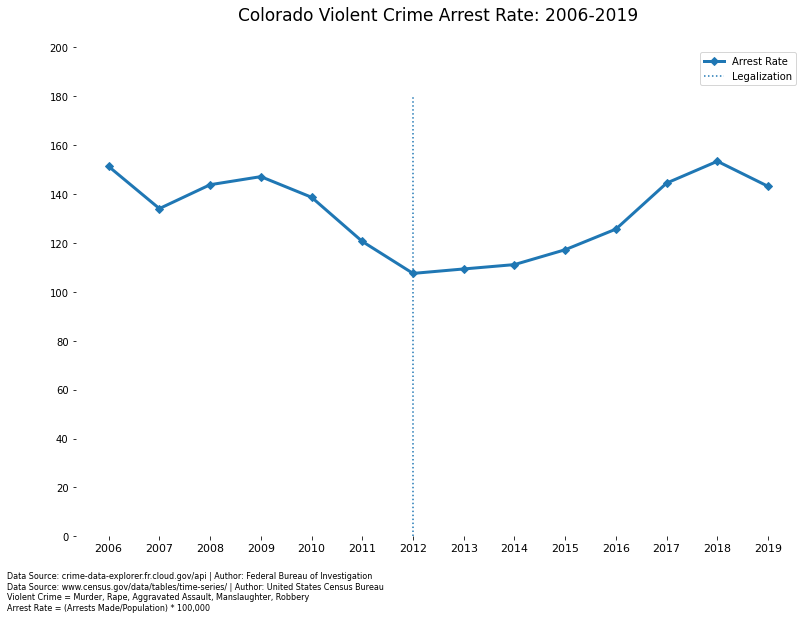

In [21]:
plt.figure(figsize=(13, 9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(2006,2020, 1), fontsize=11)
plt.yticks(np.linspace(0, 200, 11), fontsize=10)
plt.plot('data_year', 'arrest_rate', data=co_violent, label= 'Arrest Rate', marker='D', color='tab:blue', linewidth=3)
plt.ylim(0,200)
plt.axvline(x=2012, ymax=.9, label='Legalization', linestyle=":")
plt.title('Colorado Violent Crime Arrest Rate: 2006-2019'
          '\n ', fontsize=17)
plt.autoscale(enable=False, axis='y')
plt.text(2004, -30, "Data Source: crime-data-explorer.fr.cloud.gov/api | Author: Federal Bureau of Investigation"
           "\nData Source: www.census.gov/data/tables/time-series/ | Author: United States Census Bureau"
           "\nViolent Crime = Murder, Rape, Aggravated Assault, Manslaughter, Robbery"
           "\nArrest Rate = (Arrests Made/Population) * 100,000", fontsize = 8)
plt.legend()
plt.savefig("CO_Violent_Graph.png")
plt.show()

# CO Drug Related Crime Graph

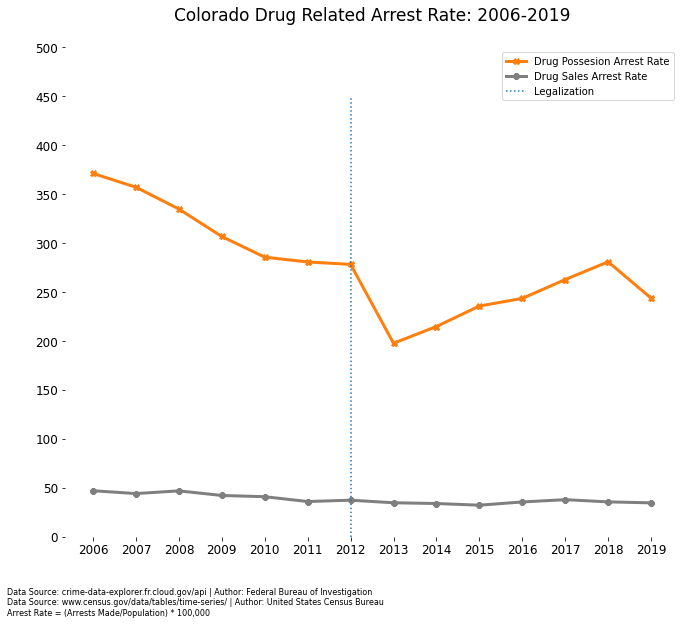

In [19]:
plt.figure(figsize=(11, 9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(2006,2020, 1), fontsize=12)
plt.yticks(np.linspace(0, 500, 11), fontsize=12)
plt.plot('data_year', 'poss_arrest_rate', data=co_drug_subtotals, label='Drug Possesion Arrest Rate', marker='X', color='tab:orange', linewidth=3)
plt.plot('data_year', 'sales_arrest_rate', data=co_drug_subtotals, label="Drug Sales Arrest Rate", marker='8', color='tab:gray', linewidth=3)
plt.ylim(0,500)
plt.axvline(x=2012, ymax = .9, label='Legalization', linestyle=":")
plt.title('Colorado Drug Related Arrest Rate: 2006-2019'
          '\n ', fontsize=17)
plt.autoscale(enable=False, axis='y')
plt.text(2004, -80, "Data Source: crime-data-explorer.fr.cloud.gov/api | Author: Federal Bureau of Investigation"
           "\nData Source: www.census.gov/data/tables/time-series/ | Author: United States Census Bureau"
           "\nArrest Rate = (Arrests Made/Population) * 100,000", fontsize = 8)
plt.legend()
plt.savefig("CO_Drug_Related_Graph.png")
plt.show()

# CO Petty Crime Graph

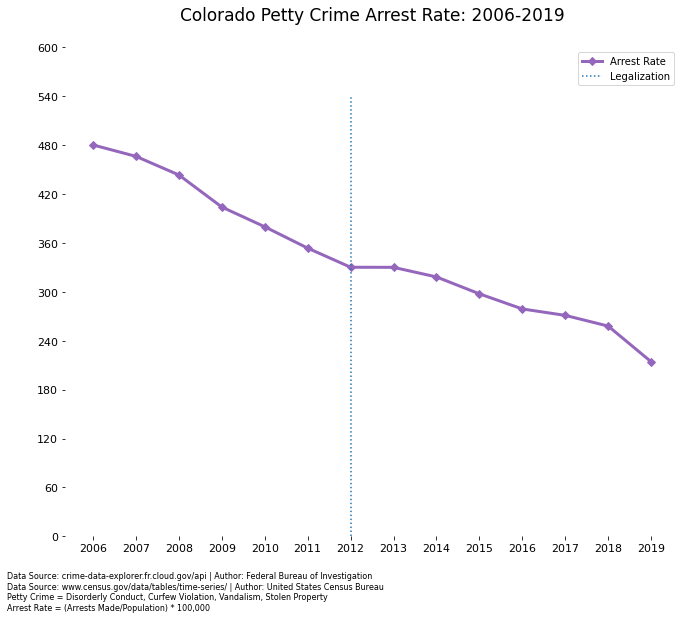

In [18]:
plt.figure(figsize=(11, 9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(2006,2020, 1), fontsize=11)
plt.yticks(np.linspace(0, 600, 11), fontsize=11)
plt.plot('data_year', 'arrest_rate', data=co_petty, label='Arrest Rate', marker='D', color='tab:purple', linewidth=3)
plt.ylim(0,600)
plt.axvline(x=2012, ymax=0.90, label='Legalization', linestyle=":")
plt.title('Colorado Petty Crime Arrest Rate: 2006-2019'
          '\n ', fontsize=17)
plt.autoscale(enable=False, axis='y')
plt.text(2004, -90, "Data Source: crime-data-explorer.fr.cloud.gov/api | Author: Federal Bureau of Investigation"
           "\nData Source: www.census.gov/data/tables/time-series/ | Author: United States Census Bureau"
           "\nPetty Crime = Disorderly Conduct, Curfew Violation, Vandalism, Stolen Property"
           "\nArrest Rate = (Arrests Made/Population) * 100,000", fontsize = 8)
plt.legend()
plt.savefig("CO_Petty_Graph.png")
plt.show()

# CO Combined Arrest Rate

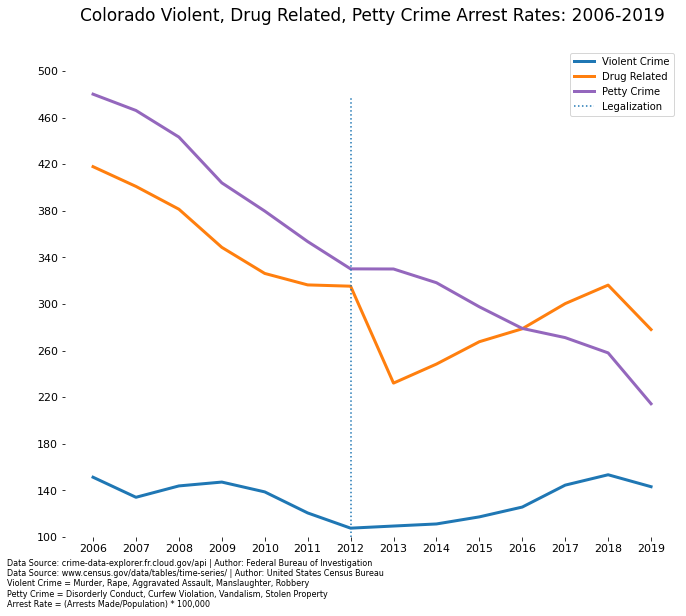

In [6]:
plt.figure(figsize=(11, 9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(2006,2020, 1), fontsize=11)
plt.yticks(np.linspace(100, 500, 11), fontsize=11)
plt.plot('data_year', 'arrest_rate', data=co_violent, marker='', color='tab:blue', linewidth=3, label='Violent Crime')
plt.plot('data_year', 'arrest_rate', data=co_drug_subtotals, marker='', color='tab:orange', linewidth=3, label='Drug Related')
plt.plot('data_year', 'arrest_rate', data=co_petty, marker='', color='tab:purple', linewidth=3, label='Petty Crime')
plt.ylim(100,520)
plt.axvline(x=2012, ymax=.9, label='Legalization', linestyle=":")
plt.title('Colorado Violent, Drug Related, Petty Crime Arrest Rates: 2006-2019'
          '\n ', fontsize=17)
plt.autoscale(enable=False, axis='y')
plt.text(2004, 40, "Data Source: crime-data-explorer.fr.cloud.gov/api | Author: Federal Bureau of Investigation"
           "\nData Source: www.census.gov/data/tables/time-series/ | Author: United States Census Bureau"
           "\nViolent Crime = Murder, Rape, Aggravated Assault, Manslaughter, Robbery"
           "\nPetty Crime = Disorderly Conduct, Curfew Violation, Vandalism, Stolen Property "
           "\nArrest Rate = (Arrests Made/Population) * 100,000", fontsize = 8)
plt.legend()
plt.savefig('CO_Combined_Graph.png')
plt.show()

# CO & National Violent Crime Graph

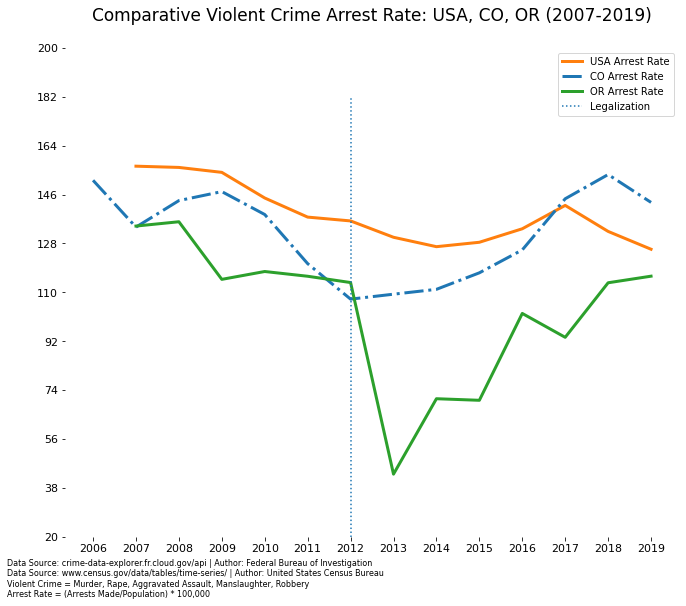

In [7]:
plt.figure(figsize=(11, 9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(2006,2020, 1), fontsize=11)
plt.yticks(np.linspace(20, 200, 11), fontsize=11)
plt.plot('data_year', 'arrest_rate', data=nat_violent, marker='', color='tab:orange', linewidth=3, label='USA Arrest Rate')
plt.plot('data_year', 'arrest_rate', data=co_violent, marker='', linestyle='dashdot',color='tab:blue', linewidth=3, label='CO Arrest Rate')
plt.plot('data_year', 'arrest_rate', data=or_violent, marker='', color='tab:green', linewidth=3, label='OR Arrest Rate')
plt.ylim(20, 200)
plt.axvline(x=2012, ymax=.9, label='Legalization', linestyle=":")
plt.title('Comparative Violent Crime Arrest Rate: USA, CO, OR (2007-2019)'
          '\n ', fontsize=17)
plt.autoscale(enable=False, axis='y')
plt.text(2004, -2, "Data Source: crime-data-explorer.fr.cloud.gov/api | Author: Federal Bureau of Investigation"
           "\nData Source: www.census.gov/data/tables/time-series/ | Author: United States Census Bureau"
           "\nViolent Crime = Murder, Rape, Aggravated Assault, Manslaughter, Robbery"
           "\nArrest Rate = (Arrests Made/Population) * 100,000", fontsize = 8)
plt.legend()
plt.savefig('CO_plus_USA_Violent_Graph.png')
plt.show()

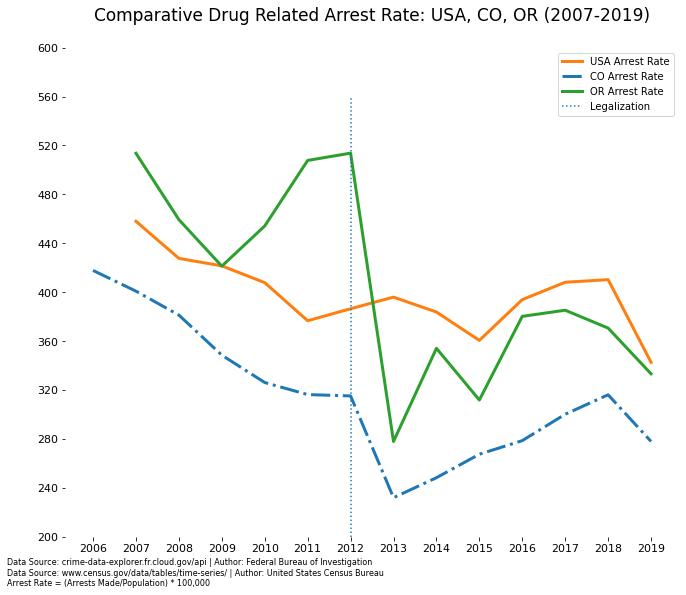

In [12]:
plt.figure(figsize=(11, 9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(2006,2020, 1), fontsize=11)
plt.yticks(np.linspace(200, 600, 11), fontsize=11)
plt.plot('data_year', 'arrest_rate', data=nat_drug_subtotals, marker='', color='tab:orange', linewidth=3, label='USA Arrest Rate')
plt.plot('data_year', 'arrest_rate', data=co_drug_subtotals, marker='', linestyle='dashdot', color='tab:blue', linewidth=3, label='CO Arrest Rate')
plt.plot('data_year', 'arrest_rate', data=or_drug_subtotals, marker='', color='tab:green', linewidth=3, label='OR Arrest Rate')
plt.ylim(200, 600)
plt.axvline(x=2012, ymax=.9, label='Legalization', linestyle=":")
plt.title('Comparative Drug Related Arrest Rate: USA, CO, OR (2007-2019)'
          '\n ', fontsize=17)
plt.autoscale(enable=False, axis='y')
plt.text(2004, 160, "Data Source: crime-data-explorer.fr.cloud.gov/api | Author: Federal Bureau of Investigation"
           "\nData Source: www.census.gov/data/tables/time-series/ | Author: United States Census Bureau"
           "\nArrest Rate = (Arrests Made/Population) * 100,000", fontsize = 8)
plt.legend()
plt.savefig('CO_plus_USA_Drug_Related_Graph.png')
plt.show()

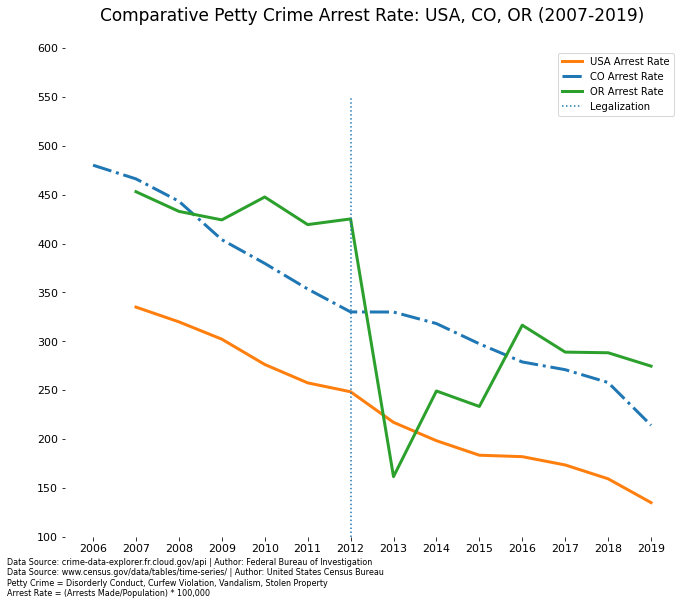

In [13]:
plt.figure(figsize=(11, 9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(2006,2020, 1), fontsize=11)
plt.yticks(np.linspace(100, 600, 11), fontsize=11)
plt.plot('data_year', 'arrest_rate', data=nat_petty, marker='', color='tab:orange', linewidth=3, label='USA Arrest Rate')
plt.plot('data_year', 'arrest_rate', data=co_petty, marker='', linestyle='dashdot', color='tab:blue', linewidth=3, label='CO Arrest Rate')
plt.plot('data_year', 'arrest_rate', data=or_petty, marker='', color='tab:green', linewidth=3, label='OR Arrest Rate')
plt.ylim(100, 600)
plt.axvline(x=2012, ymax=.9, label='Legalization', linestyle=":")
plt.title('Comparative Petty Crime Arrest Rate: USA, CO, OR (2007-2019)'
          '\n ', fontsize=17)
plt.autoscale(enable=False, axis='y')
plt.text(2004, 40, "Data Source: crime-data-explorer.fr.cloud.gov/api | Author: Federal Bureau of Investigation"
           "\nData Source: www.census.gov/data/tables/time-series/ | Author: United States Census Bureau"
           "\nPetty Crime = Disorderly Conduct, Curfew Violation, Vandalism, Stolen Property"
           "\nArrest Rate = (Arrests Made/Population) * 100,000", fontsize = 8)
plt.legend()
plt.savefig('CO_plus_USA_Petty_Graph.png')
plt.show()